In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import fixed



In [11]:
# Load data
data = pd.read_csv("../result_hoeffding_classifier.csv", dtype={"zip_code": str})
dynamic_window_times = pd.read_csv("movielens_dynamic_window_time_hoeffding_classifier_gender_dynamic_Tb_3_Tin_2_alpha_98_time_unit_24 hour.csv")
fixed_window_times = pd.read_csv("movielens_fixed_window_time_hoeffding_classifier_gender_per_item_alpha_98_time_unit_24 hour.csv")
fixed_window_times = fixed_window_times["fixed_window_times"].tolist()
dynamic_window_times = dynamic_window_times["dynamic_window_times"].tolist()
data_arrival_times = data["datetime"].tolist()



In [12]:
print("length of fixed window times: ", len(fixed_window_times))
print("length of dynamic window times: ", len(dynamic_window_times))
print("length of data arrival times: ", len(data_arrival_times))

length of fixed window times:  214
length of dynamic window times:  188
length of data arrival times:  100000


## number of ratings per user

In [21]:
user_rating_count = data.groupby('user').size().reset_index(name='num_ratings')
# Display the result
print(user_rating_count)
print(user_rating_count.min())
print("\n\n")


s = data[data["user"] == 259]
print(s.datetime)





     user  num_ratings
0       1          272
1       2           62
2       3           54
3       4           24
4       5          175
..    ...          ...
938   939           49
939   940          107
940   941           22
941   942           79
942   943          168

[943 rows x 2 columns]
user            1
num_ratings    20
dtype: int64



0        1997-09-20 05:05:10
1        1997-09-20 05:05:27
2        1997-09-20 05:05:54
3        1997-09-20 05:06:21
4        1997-09-20 05:07:23
5        1997-09-20 05:08:02
6        1997-09-20 05:08:02
7        1997-09-20 05:08:25
8        1997-09-20 05:08:57
9        1997-09-20 05:09:48
10       1997-09-20 05:11:21
11       1997-09-20 05:12:00
12       1997-09-20 05:14:24
13       1997-09-20 05:16:26
14       1997-09-20 05:18:05
15       1997-09-20 05:18:05
944      1997-09-21 04:30:57
945      1997-09-21 04:30:57
946      1997-09-21 04:31:31
947      1997-09-21 04:33:12
948      1997-09-21 04:34:52
10226    1997-10-09 04:43:23
10227    1

### total duration of data

In [34]:

data["datetime"] = pd.to_datetime(data["datetime"])
lst = data["datetime"].tolist()
total_duration = lst[-1] - lst[0]
print(f"Total duration of data: {total_duration}")
print("in minutes: ", total_duration.total_seconds() / 60)
print("in seconds: ", total_duration.total_seconds())



Total duration of data: 214 days 20:05:28
in minutes:  309365.4666666667
in seconds:  18561928.0


## number of ratins of user 259

In [28]:
# Filter the data for user 259
user_id = 259
user_data = data[data['user'] == user_id]
print(user_data["datetime"])
print(f"user {user_id} has {len(user_data)} ratings.")

# Convert 'timestamp' column to datetime
user_data['datetime'] = pd.to_datetime(data['datetime'])

# Sort by timestamp (this is important to ensure consecutive timestamps)
user_data = user_data.sort_values(by='datetime').reset_index(drop=True)

# Calculate the time differences between consecutive ratings
user_data['time_diff'] = user_data['datetime'].diff().dt.total_seconds()

# Define a session where the time difference is more than 30 minutes (1800 seconds)
session_threshold = 60*60  # 30 minutes in seconds
user_data['new_session'] = (user_data['time_diff'] > session_threshold) | (user_data['time_diff'].isna())

# print(user_data["new_session"])

# Assign a session ID by using cumulative sum of new sessions
user_data['session_id'] = user_data['new_session'].cumsum()
# Group by session and count the number of ratings per session
session_rating_counts = user_data.groupby('session_id').size().reset_index(name='num_ratings')

# Count the number of sessions
num_sessions = user_data['session_id'].nunique()

# Print the number of sessions
print(f"User 259 has {num_sessions} sessions.")

print("Number of ratings per session for user 259:")
print(session_rating_counts)




0        1997-09-20 05:05:10
1        1997-09-20 05:05:27
2        1997-09-20 05:05:54
3        1997-09-20 05:06:21
4        1997-09-20 05:07:23
5        1997-09-20 05:08:02
6        1997-09-20 05:08:02
7        1997-09-20 05:08:25
8        1997-09-20 05:08:57
9        1997-09-20 05:09:48
10       1997-09-20 05:11:21
11       1997-09-20 05:12:00
12       1997-09-20 05:14:24
13       1997-09-20 05:16:26
14       1997-09-20 05:18:05
15       1997-09-20 05:18:05
944      1997-09-21 04:30:57
945      1997-09-21 04:30:57
946      1997-09-21 04:31:31
947      1997-09-21 04:33:12
948      1997-09-21 04:34:52
10226    1997-10-09 04:43:23
10227    1997-10-09 04:43:23
16232    1997-10-27 04:45:06
16233    1997-10-27 04:47:08
16234    1997-10-27 05:03:53
16235    1997-10-27 05:04:09
16236    1997-10-27 05:20:06
43269    1997-12-06 04:24:13
43293    1997-12-06 04:32:08
43766    1997-12-09 05:28:19
51690    1997-12-29 05:48:44
51691    1997-12-29 05:50:01
51692    1997-12-29 06:03:59
51693    1997-

/var/folders/sy/m1107g5j24x3w6mcyb9njvyw0000gn/T/ipykernel_23792/551833950.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['datetime'] = pd.to_datetime(data['datetime'])


# arrival times of data

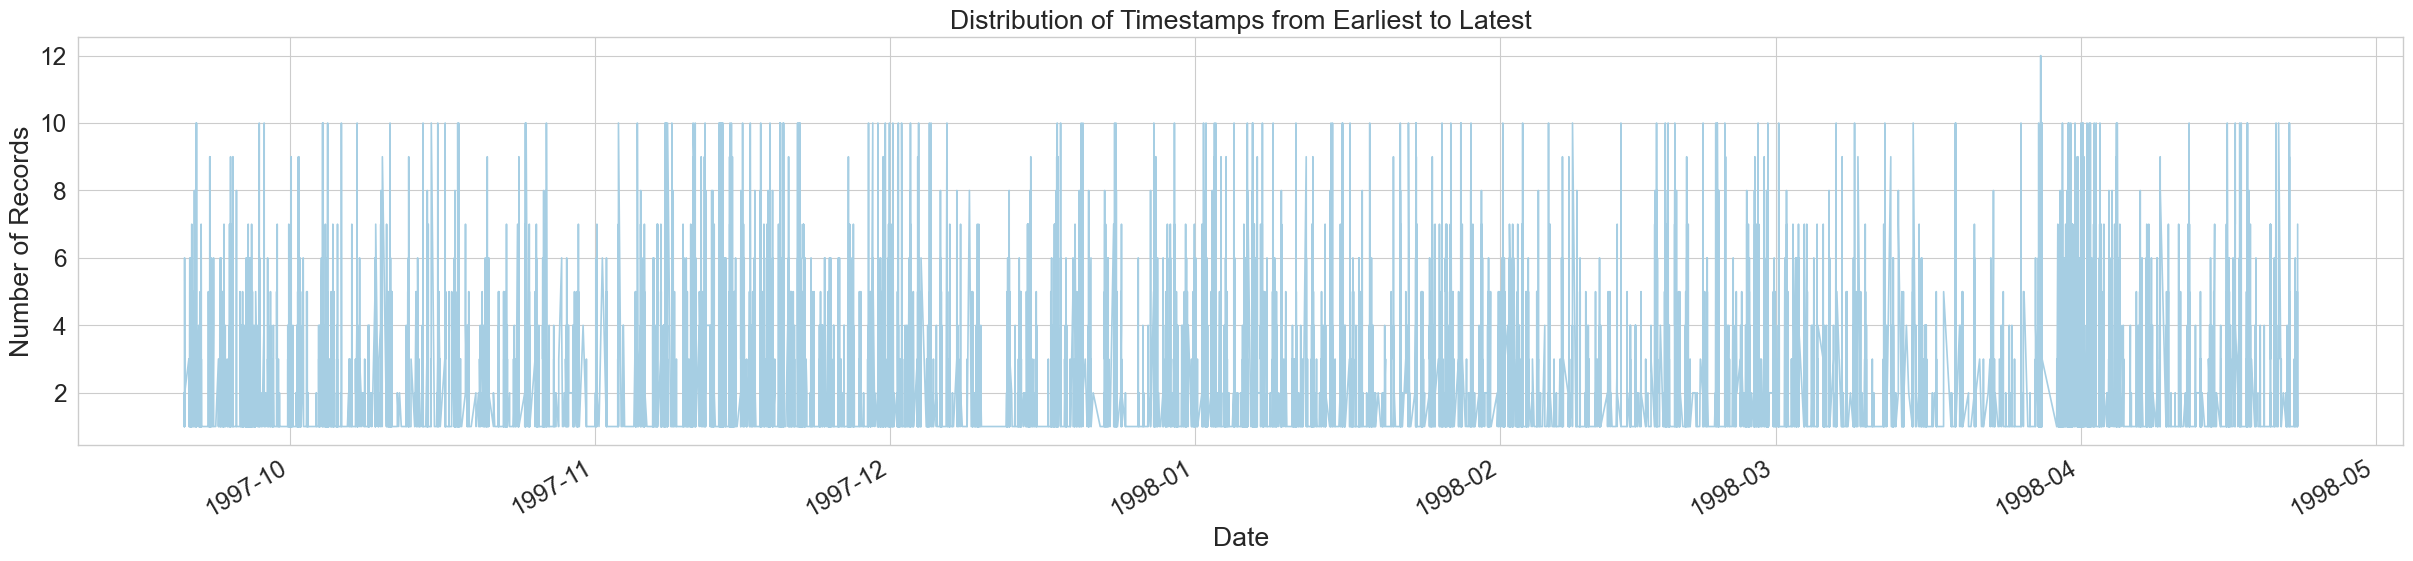

In [37]:
import matplotlib.pyplot as plt

# Group the timestamps by day, week, or month depending on your needs
timestamp_distribution = data['timestamp'].value_counts().sort_index()

# Plot the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
timestamp_distribution.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Distribution of Timestamps from Earliest to Latest')
plt.grid(True)
plt.show()

# 1. histogram frequency distribution

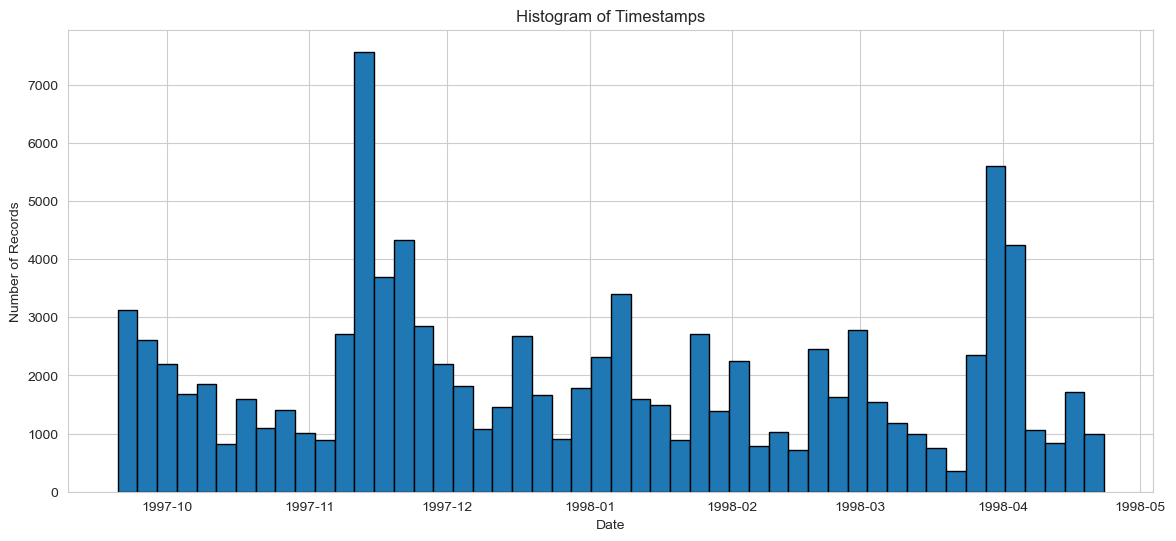

In [6]:
# Convert timestamp to datetime if not already done
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Plot histogram of timestamp counts
plt.figure(figsize=(14, 6))
plt.hist(data['timestamp'], bins=50, edgecolor='black')  # Adjust bins to control granularity
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Histogram of Timestamps')
plt.grid(True)
plt.show()


# resample data by day, week or month

## reample by day

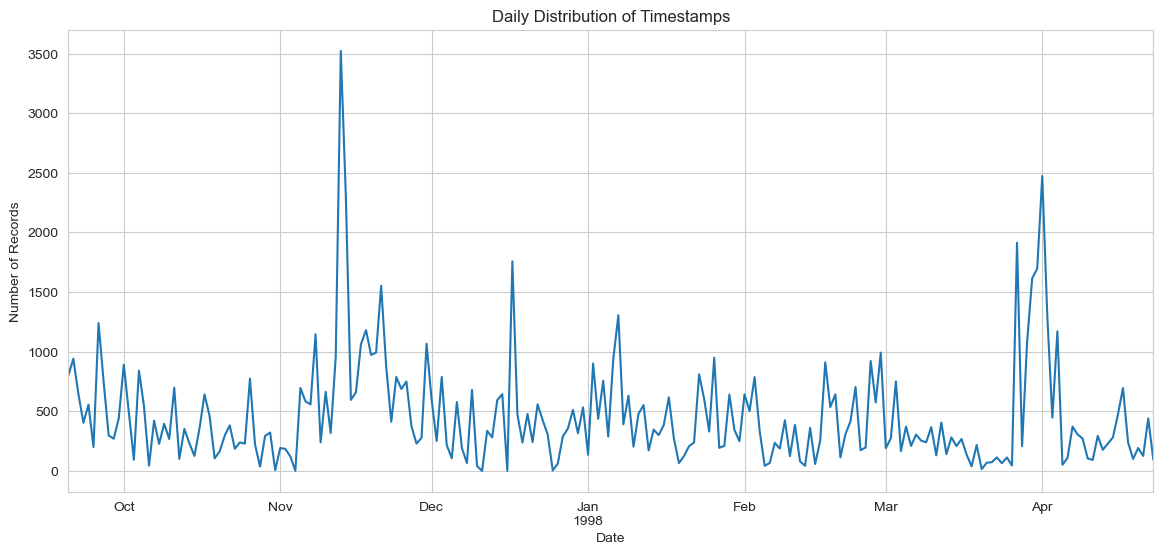

In [14]:
# Convert the 'timestamp' column to datetime if not already done
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create a copy of the DataFrame with 'timestamp' as the index (without changing the original)
data_copy = data.set_index('timestamp', drop=False)

# Now you can resample the copy by day, week, or month without affecting the original DataFrame
daily_distribution = data_copy.resample('D').size()  # Resample by day

# Plot the daily distribution
plt.figure(figsize=(14, 6))
daily_distribution.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Daily Distribution of Timestamps')
plt.grid(True)
plt.show()

## resample by week

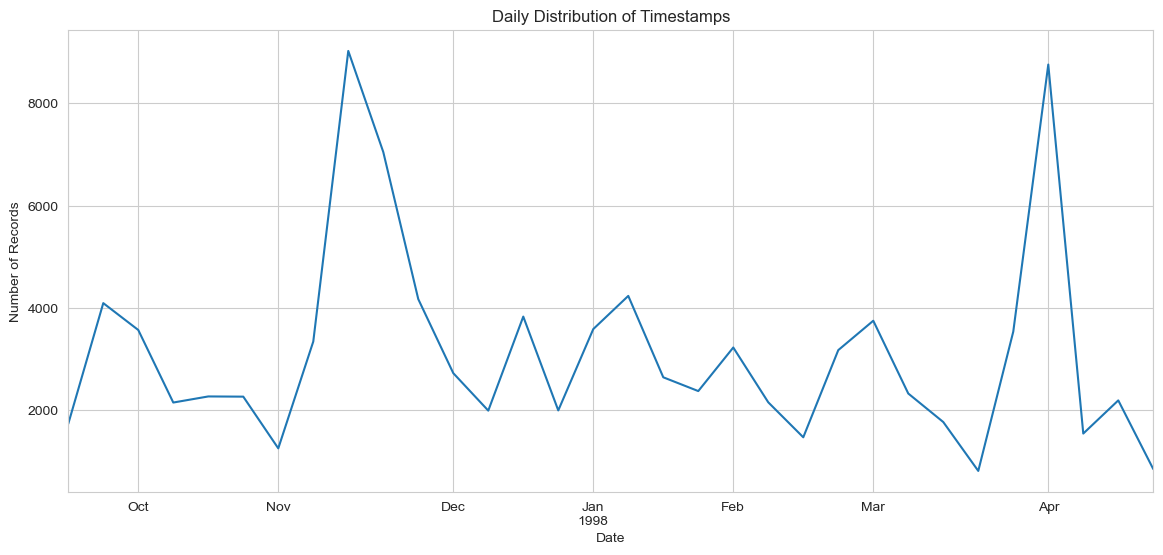

In [15]:
# Convert the 'timestamp' column to datetime if not already done
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Create a copy of the DataFrame with 'timestamp' as the index (without changing the original)
data_copy = data.set_index('timestamp', drop=False)

# Now you can resample the copy by day, week, or month without affecting the original DataFrame
daily_distribution = data_copy.resample('W').size()  # Resample by day

# Plot the daily distribution
plt.figure(figsize=(14, 6))
daily_distribution.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Daily Distribution of Timestamps')
plt.grid(True)
plt.show()

# density plot (KDE plot)

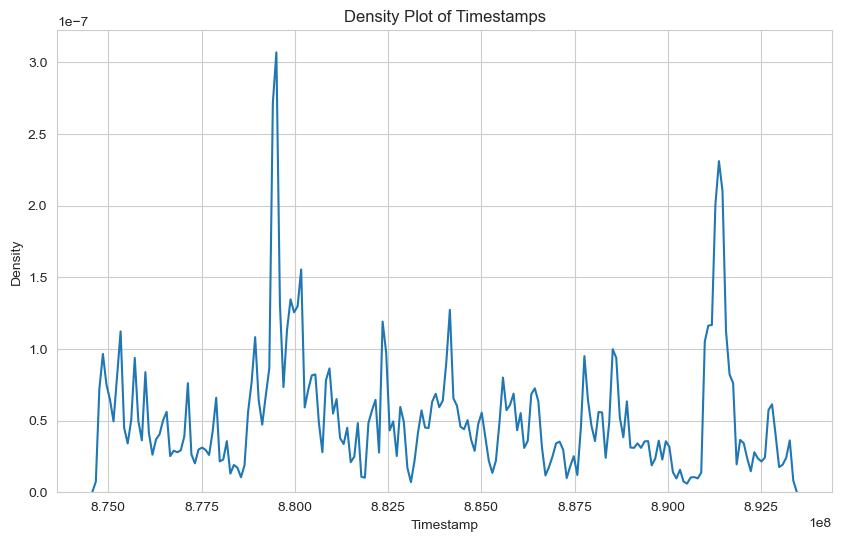

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(data['timestamp'].astype(int) / 10**9, bw_adjust=0.1)  # Convert to seconds for KDE
plt.xlabel('Timestamp')
plt.ylabel('Density')
plt.title('Density Plot of Timestamps')
plt.grid(True)
plt.show()
# 
# Bandwidth (bw_adjust): Adjusting the bandwidth (bw_adjust) can control the smoothness of the density curve. You can experiment with values to get the desired level of detail.


# bar chart for aggregated data

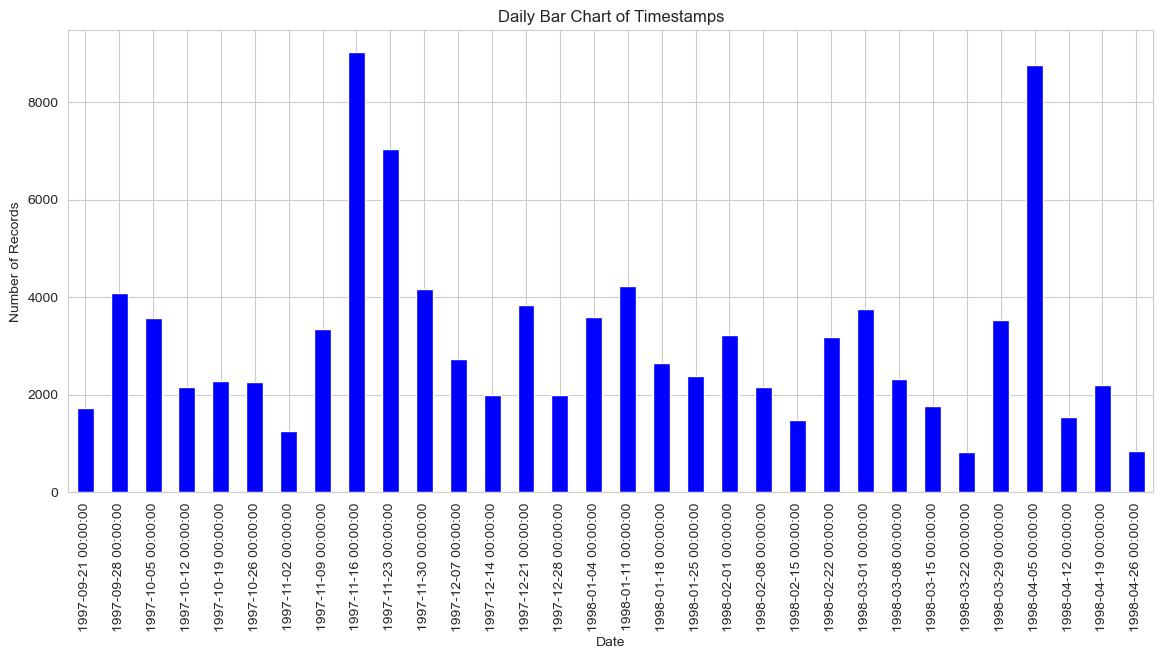

In [21]:

# Create a copy of the DataFrame with 'timestamp' as the index (without changing the original)
data_copy = data.set_index('timestamp', drop=False)
# Resample the data by day for example
daily_counts = data_copy['timestamp'].resample('W').size()


# Plot a bar chart of the resampled data
plt.figure(figsize=(14, 6))
daily_counts.plot(kind='bar', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Daily Bar Chart of Timestamps')
plt.grid(True)
plt.show()


# heatmap of data arrivals

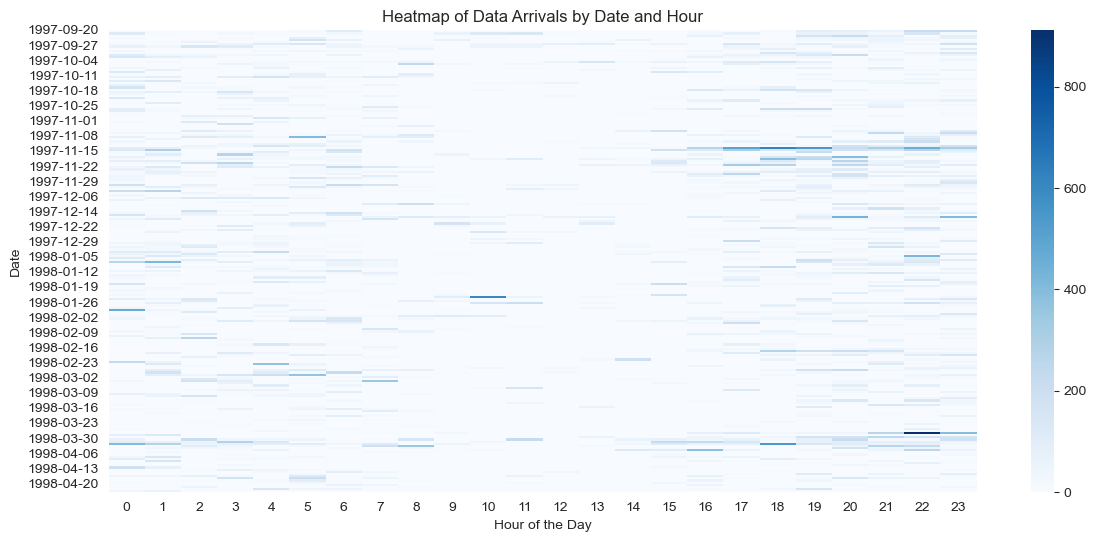

In [22]:
# Extract date and hour from the timestamps
data['date'] = data['timestamp'].dt.date
data['hour'] = data['timestamp'].dt.hour

# Create a pivot table with dates and hours
heatmap_data = data.pivot_table(index='date', columns='hour', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Heatmap of Data Arrivals by Date and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.show()


# rolling average for smoothing

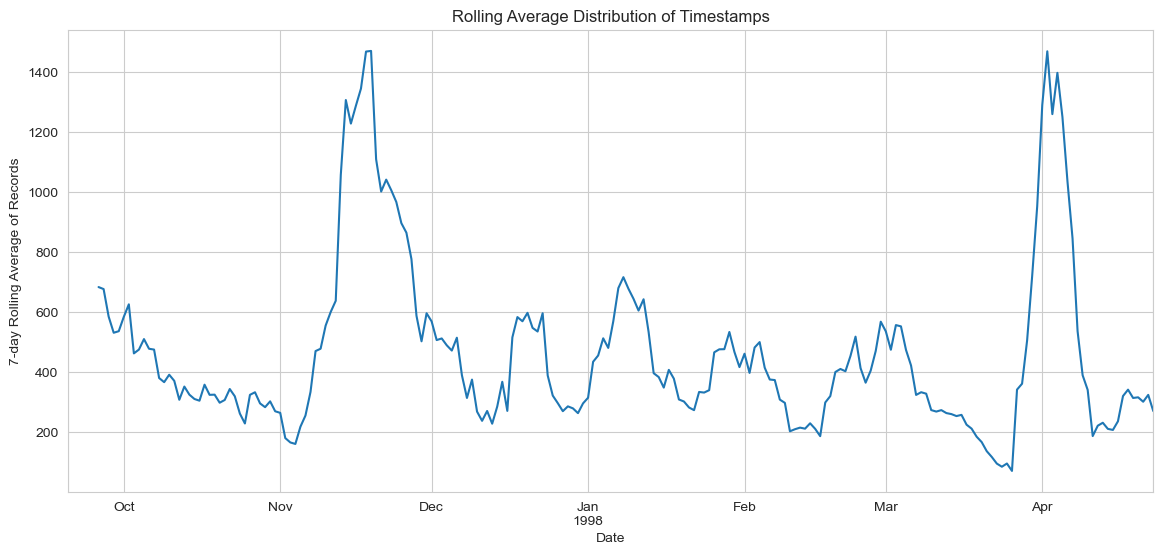

In [25]:

# Create a copy of the DataFrame with 'timestamp' as the index (without changing the original)
data_copy = data.set_index('timestamp', drop=False)
# Resample the data by day for example
daily_counts = data_copy['timestamp'].resample('W').size()

# Resample by day and apply a rolling window
rolling_distribution = data_copy['timestamp'].resample('D').size().rolling(window=7).mean()  # 7-day rolling average

# Plot the rolling distribution
plt.figure(figsize=(14, 6))
rolling_distribution.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('7-day Rolling Average of Records')
plt.title('Rolling Average Distribution of Timestamps')
plt.grid(True)
plt.show()


# data arrival gaps

To evaluate whether your time window (fixed or dynamic) makes sense in relation to the data arrival patterns, you can perform a few analyses to understand the typical behavior of the data stream. Specifically, you want to analyze:

- Data Arrival Gaps: How long is the gap between consecutive data arrivals? If data arrives continuously for 30 minutes and then stops until the next day, a 1-day window might indeed make sense.

- Burstiness: Is the data arriving in bursts, or is it spread evenly over time? This can help you determine the appropriate window size for both fixed and dynamic methods.

- Distribution of Arrival Times: Visualizing how the data arrives over time (e.g., hourly, daily, or weekly patterns) can help inform your decision on whether the window size is too small or too large.
- 
Approach
1. Analyze Gaps Between Consecutive Data Points:

Calculate the time differences (gaps) between consecutive data arrivals.
Analyze whether these gaps tend to be small (continuous arrivals) or large (sporadic bursts).

2. Visualize Data Arrival Patterns:

Use visualizations like histograms or time series plots to observe the density of data arrivals.
Compare the frequency of arrivals with your window size to see if the window makes sense.


## Step 1: Calculate Time Gaps Between Arrivals
To understand the typical gap between consecutive arrivals, you can calculate the time difference between each pair of consecutive timestamps:

In [35]:
import pandas as pd

# Load data
data = pd.read_csv("../result_hoeffding_classifier.csv", dtype={"zip_code": str})
dynamic_window_times = pd.read_csv("movielens_dynamic_window_time_hoeffding_classifier_gender_dynamic_Tb_3_Tin_2_alpha_98_time_unit_24 hour.csv")
fixed_window_times = pd.read_csv("movielens_fixed_window_time_hoeffding_classifier_gender_per_item_alpha_98_time_unit_24 hour.csv")
fixed_window_times = fixed_window_times["fixed_window_times"].tolist()
dynamic_window_times = dynamic_window_times["dynamic_window_times"].tolist()
data_arrival_times = data["datetime"].tolist()

# Convert 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Calculate the time differences (gaps) between consecutive arrivals
data['time_diff'] = data['timestamp'].diff().dt.total_seconds() / 60  # Time diff in minutes

# Print the time differences
print(data[['timestamp', 'time_diff']])


                timestamp  time_diff
0     1997-09-20 05:05:10        NaN
1     1997-09-20 05:05:27   0.283333
2     1997-09-20 05:05:54   0.450000
3     1997-09-20 05:06:21   0.450000
4     1997-09-20 05:07:23   1.033333
...                   ...        ...
99995 1998-04-23 01:10:38   0.000000
99996 1998-04-23 01:10:38   0.000000
99997 1998-04-23 01:10:38   0.000000
99998 1998-04-23 01:10:38   0.000000
99999 1998-04-23 01:10:38   0.000000

[100000 rows x 2 columns]


In [39]:
# proportion of gaps smaller than 10min

def get_proportion_small_gaps(data, threshold=30):
    # Calculate the total number of gaps
    total_gaps = len(data) - 1
    data_small_gaps = data[data['time_diff'] <= threshold]
    num_small_gaps = len(data_small_gaps)
    proportion_small_gaps = num_small_gaps / total_gaps
    return total_gaps, num_small_gaps, proportion_small_gaps
threshold = 30
total_gaps, num_small_gaps, proportion_small_gaps = get_proportion_small_gaps(data, threshold)
print(f"Number of gaps smaller than {threshold} minutes: {num_small_gaps}")
print(f"Proportion of gaps smaller than {threshold} minutes: {proportion_small_gaps:.2%}")



Number of gaps smaller than 30 minutes: 98507
Proportion of gaps smaller than 30 minutes: 98.51%


## Step 2: Visualize the Distribution of Gaps
Plot the distribution of time gaps to see if there’s a typical duration (e.g., 30 minutes) between data arrivals:

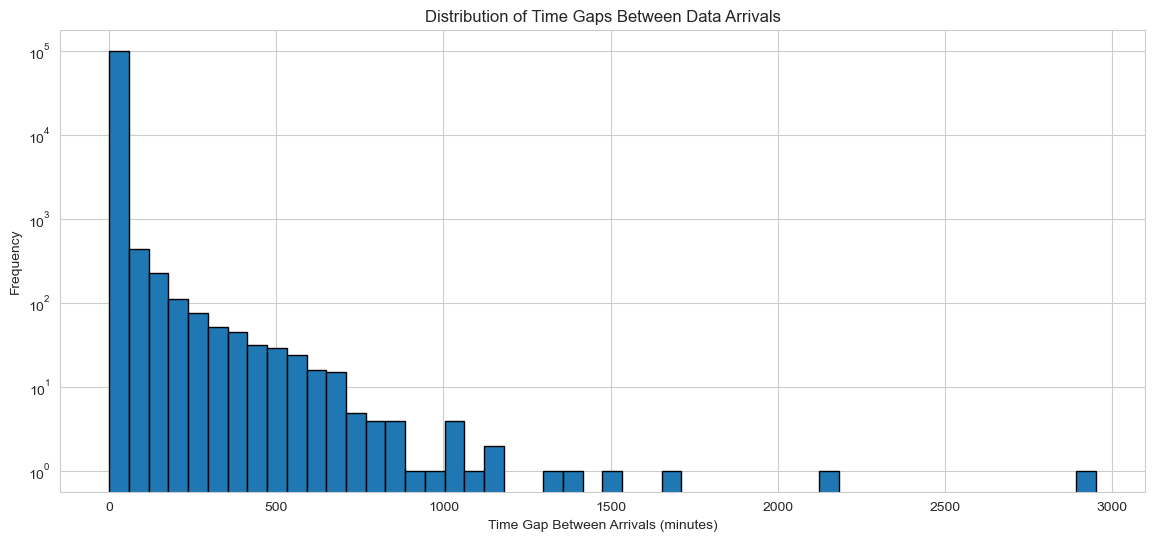

In [75]:
import matplotlib.pyplot as plt

# Drop the first row (which has NaN in time_diff due to the diff() operation)
data_gaps = data['time_diff'].dropna()

# Plot histogram of time gaps
plt.figure(figsize=(14, 6))
plt.hist(data_gaps, bins=50, edgecolor='black')
plt.xlabel('Time Gap Between Arrivals (minutes)')
plt.ylabel('Frequency')
plt.yscale("log")
plt.title('Distribution of Time Gaps Between Data Arrivals')
plt.grid(True)
plt.show()


## Step 3: Analyze if Fixed Windows Make Sense
For Fixed Windows:
If you notice that data typically arrives in bursts (e.g., every 30 minutes for a few hours and then no data for the rest of the day), a daily fixed window might make sense.
Look at the mode of the time gaps or the typical burst duration (e.g., 30 minutes, 1 hour) to see if your window size captures the data effectively.
You can visualize the data in fixed windows (e.g., 1-day windows) to confirm if the window size works well:

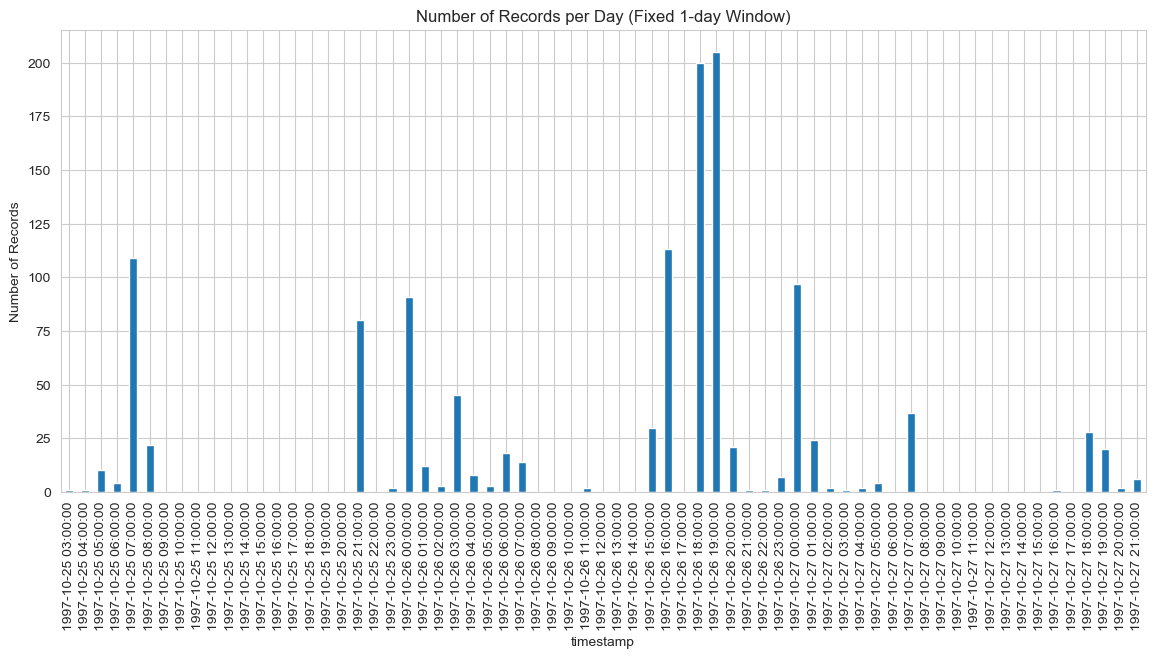

In [53]:
data = pd.read_csv("../result_hoeffding_classifier.csv", dtype={"zip_code": str})   

# Convert 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Filter the data to include only records from October 1997 to November 1997
filtered_data = data[(data['timestamp'] >= '1997-10-25') & (data['timestamp'] < '1997-10-28')]


# Resample the data into 1-day windows and count the number of records per window
filtered_data.set_index('timestamp', inplace=True)
daily_distribution = filtered_data.resample('H').size()

# Plot the daily distribution
plt.figure(figsize=(14, 6))
daily_distribution.plot(kind='bar')
# plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.title('Number of Records per Day (Fixed 1-day Window)')
plt.grid(True)
plt.show()


## Step 4: Analyze if Dynamic Windows Make Sense

### 1. Simulate Dynamic Window Resets Based on Tin and Tb

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

# Load data
data = pd.read_csv("../result_hoeffding_classifier.csv", dtype={"zip_code": str})

# Convert 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Calculate time gaps between consecutive data arrivals
data['time_diff'] = data['timestamp'].diff().dt.total_seconds() / 60  # Time diff in minutes

# Parameters for dynamic window
Tin = 60  # Maximum allowed time between data points in minutes
Tb = 1440  # Maximum window length in minutes (e.g., 1 day)

# Track dynamic window resets
current_batch_start = data['timestamp'].iloc[0]
window_resets = []

for i in range(1, len(data)):
    time_gap = data['time_diff'].iloc[i]
    current_window_length = (data['timestamp'].iloc[i] - current_batch_start).total_seconds() / 60  # in minutes
    
    # Check if dynamic window should reset
    if time_gap > Tin or current_window_length > Tb:
        window_resets.append(data['timestamp'].iloc[i])  # Record reset point
        current_batch_start = data['timestamp'].iloc[i]  # Start a new batch
    
# Convert window reset times to a DataFrame for easy handling
reset_times = pd.DataFrame(window_resets, columns=['reset_time'])

# Print reset points for dynamic windows
print(reset_times)


              reset_time
0    1997-09-20 16:56:48
1    1997-09-20 18:51:26
2    1997-09-21 03:30:53
3    1997-09-21 08:45:13
4    1997-09-21 16:53:25
...                  ...
1084 1998-04-22 03:56:27
1085 1998-04-22 06:13:40
1086 1998-04-22 16:00:37
1087 1998-04-22 18:52:40
1088 1998-04-22 22:12:29

[1089 rows x 1 columns]


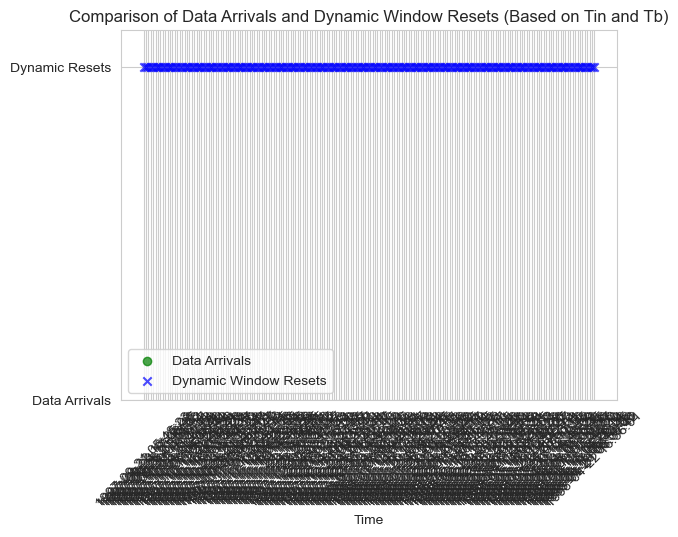

In [43]:
# Convert arrival times and reset times to numeric values for plotting
data_arrival_times_numeric = data['timestamp'].astype(int) / 10**9  # Convert to seconds for plotting
dynamic_window_times = pd.read_csv("movielens_dynamic_window_time_hoeffding_classifier_gender_dynamic_Tb_3_Tin_2_alpha_98_time_unit_24 hour.csv")

reset_times_numeric = dynamic_window_times['dynamic_window_times'].tolist()


# Plot data arrival times as green dots (y=1)
plt.scatter(data_arrival_times_numeric, [1] * len(data_arrival_times_numeric), color='green', label='Data Arrivals', marker='o', alpha=0.7)

# Plot dynamic window reset points as blue crosses (y=2)
plt.scatter(reset_times_numeric, [2] * len(reset_times_numeric), color='blue', label='Dynamic Window Resets', marker='x', alpha=0.7)

# Label the x-axis with datetime format
plt.xticks(rotation=45)
plt.yticks([1, 2], ['Data Arrivals', 'Dynamic Resets'])
plt.xlabel('Time')
plt.title('Comparison of Data Arrivals and Dynamic Window Resets (Based on Tin and Tb)')
plt.legend()
plt.grid(True)
plt.show()


### resample

In [44]:
# import pandas as pd
# import matplotlib.pyplot as plt
# 
# import pandas as pd
# 
# # Load data
# data = pd.read_csv("../result_hoeffding_classifier.csv", dtype={"zip_code": str})
# 
# # Convert the 'timestamp' column to datetime if not already done
# data['timestamp'] = pd.to_datetime(data['timestamp'])
# 
# # Create a copy of the DataFrame with 'timestamp' as the index (without changing the original)
# data_copy = data.set_index('timestamp', drop=False)
# 
# resampled_data = data_copy.resample('300T').size()
# 
# # Resample reset times by 30-minute intervals
# reset_times.set_index('reset_time', inplace=True)
# resampled_resets = reset_times.resample('300T').size()
# 
# # Plot resampled data
# plt.figure(figsize=(14, 6))
# resampled_data.plot(kind='bar', color='green', alpha=0.7, label='Data Arrivals')
# resampled_resets.plot(kind='bar', color='blue', alpha=0.7, label='Dynamic Resets')
# 
# plt.xticks(rotation=45)
# plt.xlabel('Time')
# plt.ylabel('Number of Records')
# plt.title('Resampled Data Arrivals and Dynamic Resets (30-minute intervals)')
# plt.legend()
# plt.grid(True)
# plt.show()


KeyError: "None of ['reset_time'] are in the columns"

# calculate number of sessions per user

Summary Statistics:
count    2537.000000
mean       39.416634
std        63.167566
min         1.000000
25%         2.000000
50%        14.000000
75%        47.000000
max       737.000000
Name: num_ratings, dtype: float64


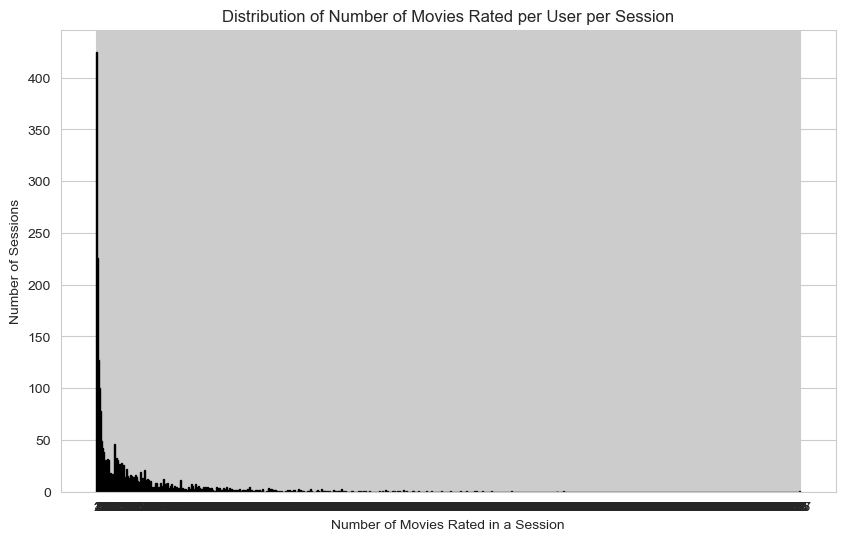


Number of Sessions by Number of Movies Rated:
1      425
2      226
3      127
4      100
5       78
      ... 
414      1
435      1
483      1
490      1
737      1
Name: num_ratings, Length: 259, dtype: int64

Average number of sessions per user: 2.69


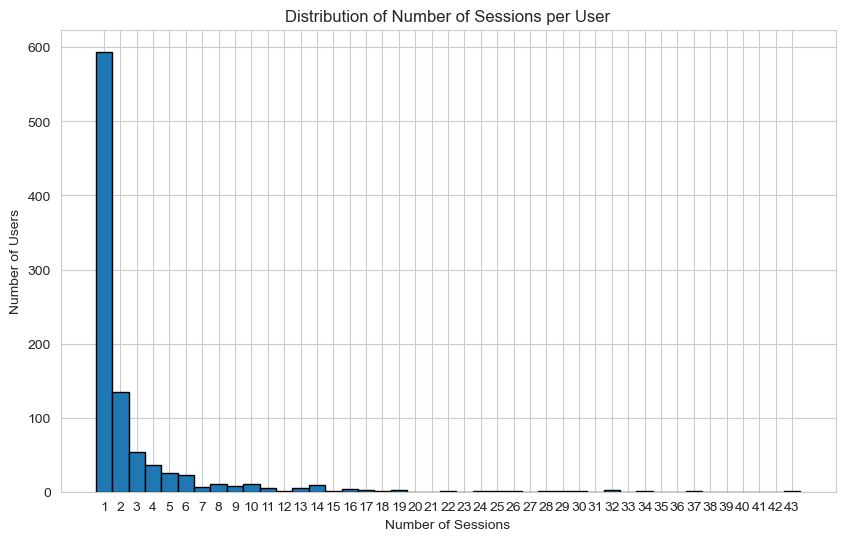

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../result_hoeffding_classifier.csv", dtype={"zip_code": str})

# Convert the 'timestamp' column to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'])

# For demonstration purposes, we'll assume 'df' is already loaded and contains 'user', 'movieId', and 'timestamp'.

# Step 2: Convert timestamps to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Step 3: Extract the date from the timestamp
df['date'] = df['timestamp'].dt.date

# Step 4: Group by 'user' and 'date' and count the number of movies rated
ratings_per_session = df.groupby(['user', 'date']).size().reset_index(name='num_ratings')

# Step 5: Analyze the distribution
print("Summary Statistics:")
print(ratings_per_session['num_ratings'].describe())

# Step 6: Visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_session['num_ratings'], bins=range(1, ratings_per_session['num_ratings'].max() + 2), edgecolor='black', align='left')
plt.title('Distribution of Number of Movies Rated per User per Session')
plt.xlabel('Number of Movies Rated in a Session')
plt.ylabel('Number of Sessions')
plt.xticks(range(1, ratings_per_session['num_ratings'].max() + 1))
plt.show()

# Optional: View the counts of sessions with specific numbers of ratings
ratings_counts = ratings_per_session['num_ratings'].value_counts().sort_index()
print("\nNumber of Sessions by Number of Movies Rated:")
print(ratings_counts)

# Calculate the number of sessions per user
sessions_per_user = ratings_per_session.groupby('user').size().reset_index(name='num_sessions')

# Compute average sessions per user
average_sessions_per_user = sessions_per_user['num_sessions'].mean()
print(f"\nAverage number of sessions per user: {average_sessions_per_user:.2f}")

# Optional: Distribution of sessions per user
plt.figure(figsize=(10, 6))
plt.hist(sessions_per_user['num_sessions'], bins=range(1, sessions_per_user['num_sessions'].max() + 2), edgecolor='black', align='left')
plt.title('Distribution of Number of Sessions per User')
plt.xlabel('Number of Sessions')
plt.ylabel('Number of Users')
plt.xticks(range(1, sessions_per_user['num_sessions'].max() + 1))
plt.show()


# session durations

Description: A session is defined as a group of ratings where the gap between consecutive ratings is no more than 30 minutes (1800 seconds). If the gap exceeds 30 minutes or if it's the first rating (time_diff is NaN), a new session is started.

Summary Statistics of Session Durations (in minutes):
count    3305.000000
mean       13.265461
std        19.315023
min         0.000000
25%         0.016667
50%         6.016667
75%        17.966667
max       206.116667
Name: session_duration_min, dtype: float64


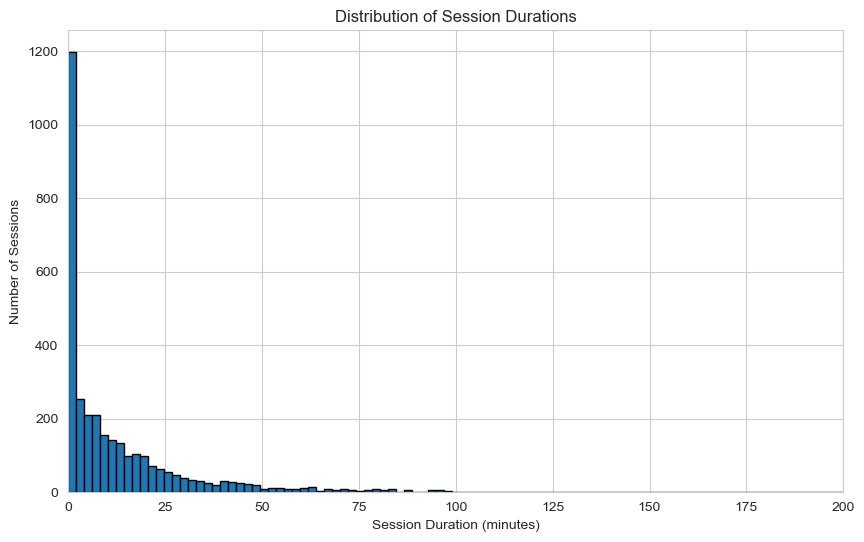


Proportion of sessions with only one rating: 19.55%


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your DataFrame
# df = pd.read_csv('ratings.csv')

# Step 2: Convert timestamps to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Step 3: Sort data by 'user' and 'timestamp'
df = df.sort_values(by=['user', 'timestamp']).reset_index(drop=True)

# Step 4: Calculate time differences between consecutive ratings
df['time_diff'] = df.groupby('user')['timestamp'].diff().dt.total_seconds()

# Step 5: Define sessions based on time gaps
threshold = 600  # max gap allowed
df['new_session'] = (df['time_diff'] > threshold) | (df['time_diff'].isna())
df['session_id'] = df.groupby('user')['new_session'].cumsum()

# Step 6: Calculate session durations
session_durations = df.groupby(['user', 'session_id']).agg(
    session_start=('timestamp', 'min'),
    session_end=('timestamp', 'max'),
    num_ratings=('item', 'count')
).reset_index()

session_durations['session_duration_sec'] = (session_durations['session_end'] - session_durations['session_start']).dt.total_seconds()
session_durations['session_duration_min'] = session_durations['session_duration_sec'] / 60  # Convert to minutes

# Step 7: Analyze the session durations
print("Summary Statistics of Session Durations (in minutes):")
print(session_durations['session_duration_min'].describe())

# Step 8: Visualize the session durations
plt.figure(figsize=(10, 6))
plt.hist(session_durations['session_duration_min'], bins=100, edgecolor='black')
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Number of Sessions')
plt.xlim(0, 200)  # Adjust the x-axis limit as needed
plt.show()

# Step 9: Handle sessions with single rating
single_rating_sessions = session_durations[session_durations['num_ratings'] == 1]
single_rating_sessions_ratio = len(single_rating_sessions) / len(session_durations)
print(f"\nProportion of sessions with only one rating: {single_rating_sessions_ratio:.2%}")


# Calculate the proportion of sessions with duration ≤ threshold

In [83]:

def get_session_duration_proportion(df, threshold=5):
    # Calculate the total number of sessions
    total_sessions = len(df)

    # Number of sessions with duration ≤ threshold
    sessions_leq_threshold = df[df['session_duration_min'] <= threshold]
    num_sessions_leq_threshold = len(sessions_leq_threshold)

    # Calculate the proportion
    proportion_leq_threshold = num_sessions_leq_threshold / total_sessions
    
    print("Number of sessions ≤ {} minutes: {}".format(threshold, num_sessions_leq_threshold))
    print("Proportion of sessions ≤ {} minutes: {:.2%}".format(threshold, proportion_leq_threshold))

    return total_sessions, num_sessions_leq_threshold, proportion_leq_threshold



total_sessions, num_sessions, proportion_session = get_session_duration_proportion(session_durations, threshold=5)

# Total number of sessions
total_sessions, num_sessions, proportion_session = get_session_duration_proportion(session_durations, threshold=10)

total_sessions, num_sessions, proportion_session = get_session_duration_proportion(session_durations, threshold=20)


total_sessions, num_sessions, proportion_session = get_session_duration_proportion(session_durations, threshold=40)


total_sessions, num_sessions, proportion_session = get_session_duration_proportion(session_durations, threshold=50)


total_sessions, num_sessions, proportion_session = get_session_duration_proportion(session_durations, threshold=60)


total_sessions, num_sessions, proportion_session = get_session_duration_proportion(session_durations, threshold=90)


total_sessions, num_sessions, proportion_session = get_session_duration_proportion(session_durations, threshold=120)





Number of sessions ≤ 5 minutes: 1537
Proportion of sessions ≤ 5 minutes: 46.51%
Number of sessions ≤ 10 minutes: 2007
Proportion of sessions ≤ 10 minutes: 60.73%
Number of sessions ≤ 20 minutes: 2577
Proportion of sessions ≤ 20 minutes: 77.97%
Number of sessions ≤ 40 minutes: 3005
Proportion of sessions ≤ 40 minutes: 90.92%
Number of sessions ≤ 50 minutes: 3121
Proportion of sessions ≤ 50 minutes: 94.43%
Number of sessions ≤ 60 minutes: 3172
Proportion of sessions ≤ 60 minutes: 95.98%
Number of sessions ≤ 90 minutes: 3269
Proportion of sessions ≤ 90 minutes: 98.91%
Number of sessions ≤ 120 minutes: 3302
Proportion of sessions ≤ 120 minutes: 99.91%


# number of fixed windows

In [80]:
# when window size is 1 hour, i want to know how many fixed windows are there
# Set the 'timestamp' column as index (without changing the original DataFrame)
data_with_index = data.set_index('timestamp')

# Resample by 1-hour windows and count the number of fixed windows
resampled_by_hour = data_with_index.resample('H').size()

# Count the number of fixed windows (non-empty windows)
num_fixed_windows = len(resampled_by_hour[resampled_by_hour > 0])

# Output the number of fixed windows
print(f"Number of fixed 1-hour windows with data: {num_fixed_windows}")

Number of fixed 1-hour windows with data: 2222


# compare fixed window times and dynamic window times with arrival times

In [14]:
# Load data
data = pd.read_csv("../result_hoeffding_classifier.csv", dtype={"zip_code": str})
dynamic_window_times = pd.read_csv("../dynamic_window/movielens_dynamic_window_reset_time_Tb_8_Tin_2_time_unit_30 min.csv")
fixed_window_times = pd.read_csv("../per_item/min_as_time_unit/movielens_fixed_window_resets_time_unit_30 min.csv")

fixed_window_times = fixed_window_times["fixed_window_reset_times"].tolist()
dynamic_window_times = dynamic_window_times["dynamic_window_reset_time"].tolist()
data_arrival_times = data["datetime"].tolist()



In [15]:
print(len(fixed_window_times))
print(len(dynamic_window_times))
print(len(data_arrival_times))



2579
2271
100000


## visualize the resets and data arrival times

Fixed window resets are represented by one symbol (e.g., red circles).
Dynamic window resets are represented by another symbol (e.g., blue crosses).
Data arrival times can be represented by a different symbol (e.g., green dots).

In [10]:
# Plot the reset times and data arrival times
plt.figure(figsize=(14, 6))

# Plot fixed window reset times as red circles (y=1)
plt.scatter(fixed_window_times, [1] * len(fixed_window_times), color='red', label='Fixed Window Resets', marker='o', alpha=0.7)

# Plot dynamic window reset times as blue crosses (y=2)
plt.scatter(dynamic_window_times, [2] * len(dynamic_window_times), color='blue', label='Dynamic Window Resets', marker='x', alpha=0.7)

# Plot data arrival times as green dots (y=3)
plt.scatter(data_arrival_times, [3] * len(data_arrival_times), color='green', label='Data Arrivals', marker='.', alpha=0.7)

# Format the plot
plt.xticks(rotation=45)
plt.yticks([1, 2, 3], ['Fixed Resets', 'Dynamic Resets', 'Data Arrivals'])
plt.xlabel('Time')
plt.title('Comparison of Fixed and Dynamic Window Resets with Data Arrivals')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

# Quantitative Comparison of Fixed and Dynamic Resets

## 1 Compare Time Gaps Between Fixed and Dynamic Resets

In [92]:
import numpy as np

# Ensure the lists are sorted (if not already)
fixed_window_times = sorted(fixed_window_times)
dynamic_window_times = sorted(dynamic_window_times)

# Find the closest dynamic reset for each fixed reset
fixed_to_dynamic_gaps = [min(abs(fixed - dynamic) for dynamic in dynamic_window_times) for fixed in fixed_window_times]

# Convert the gaps to seconds (or minutes) and print
fixed_to_dynamic_gaps_in_minutes = [gap.total_seconds() / 60 for gap in fixed_to_dynamic_gaps]
print("Time gaps between each fixed reset and the nearest dynamic reset (in minutes):")
print(fixed_to_dynamic_gaps_in_minutes)


Differences between corresponding resets (in seconds):
[3628.0, 1896.0, 35498.0, 38776.0, 38473.0, 38286.0, 38027.0, 36482.0, 35447.0, 33745.0, 31982.0, 31327.0, 37543.0, 37547.0, 38158.0, 36939.0, 42003.0, 41337.0, 39664.0, 38273.0, 37036.0, 36393.0, 49695.0, 54129.0, 52693.0, 51406.0, 49787.0, 49745.0, 48061.0, 47488.0, 105529.0, 109203.0, 107734.0, 106662.0, 106227.0, 105647.0, 108304.0, 106695.0, 115605.0, 118892.0, 130853.0, 130964.0, 151296.0, 155977.0, 155516.0, 155558.0, 154287.0, 152842.0, 151442.0, 149755.0, 153570.0, 152573.0, 151812.0, 155685.0, 154018.0, 152722.0, 159780.0, 173674.0, 181829.0, 182776.0, 182104.0, 184928.0, 184224.0, 182640.0, 185538.0, 186783.0, 185490.0, 187988.0, 188705.0, 211170.0, 239402.0, 243446.0, 243776.0, 248299.0, 247616.0, 246680.0, 245873.0, 244098.0, 243700.0, 251132.0, 250703.0, 249082.0, 249476.0, 247887.0, 247573.0, 248416.0, 249533.0, 249625.0, 247943.0, 246612.0, 246261.0, 244581.0, 245146.0, 244079.0, 243442.0, 242089.0, 240321.0, 239036

## 2 Align Window Resets with Data Arrival Times

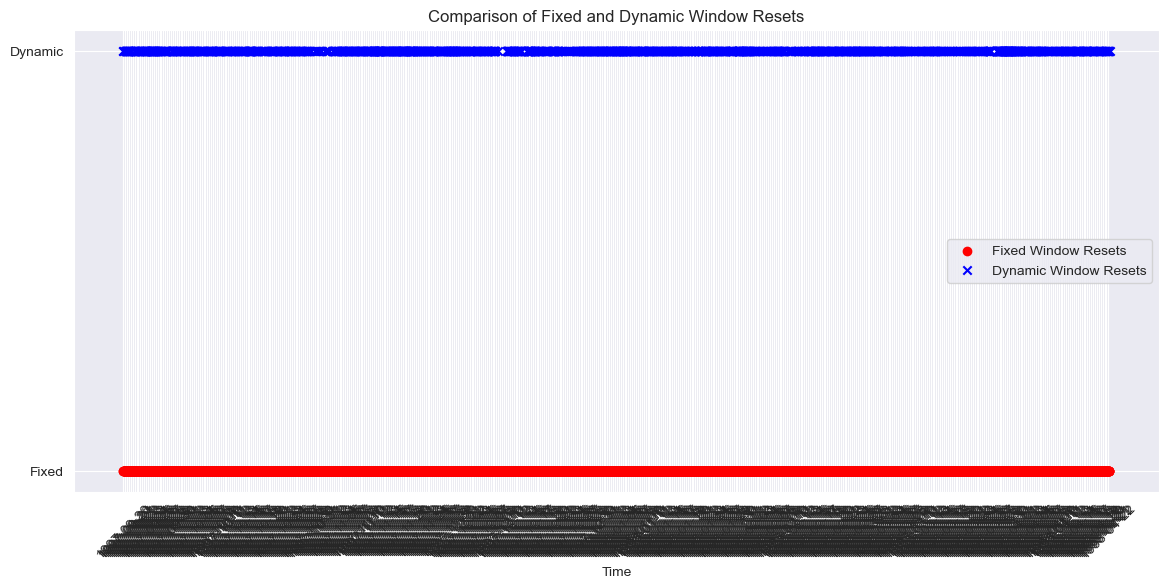

In [88]:
# Time differences between each fixed reset and nearest data arrival
fixed_to_arrival_gaps = [min(abs(fixed - arrival) for arrival in data_arrival_times) for fixed in fixed_window_times]

# Time differences between each dynamic reset and nearest data arrival
dynamic_to_arrival_gaps = [min(abs(dynamic - arrival) for arrival in data_arrival_times) for dynamic in dynamic_window_times]

# Convert the gaps to minutes
fixed_to_arrival_gaps_in_minutes = [gap.total_seconds() / 60 for gap in fixed_to_arrival_gaps]
dynamic_to_arrival_gaps_in_minutes = [gap.total_seconds() / 60 for gap in dynamic_to_arrival_gaps]

# Print the results
print("Time gaps between fixed resets and the nearest data arrival (in minutes):")
print(fixed_to_arrival_gaps_in_minutes)

print("\nTime gaps between dynamic resets and the nearest data arrival (in minutes):")
print(dynamic_to_arrival_gaps_in_minutes)


# sample data. the above methods use all data is too slow


### Step 1: Optimize Time Gap Calculations Using numpy
Instead of iterating through every possible pair of times, use numpy broadcasting to efficiently compute the differences between all pairs in one go.

In [16]:
import numpy as np

# Convert times to numpy datetime64 arrays
fixed_window_times_np = np.array(pd.to_datetime(fixed_window_times), dtype='datetime64[s]')
dynamic_window_times_np = np.array(pd.to_datetime(dynamic_window_times), dtype='datetime64[s]')
data_arrival_times_np = np.array(pd.to_datetime(data_arrival_times), dtype='datetime64[s]')

# Calculate the differences between each fixed reset and nearest dynamic reset using broadcasting
fixed_diffs = np.abs(fixed_window_times_np[:, None] - dynamic_window_times_np).min(axis=1)

# Convert to minutes
fixed_to_dynamic_gaps_in_minutes = fixed_diffs.astype('timedelta64[m]').astype(int)

print("Time gaps between each fixed reset and the nearest dynamic reset (in minutes):")
print(fixed_to_dynamic_gaps_in_minutes)


Time gaps between each fixed reset and the nearest dynamic reset (in minutes):
[ 60  28 148 ...  67  14   1]


### Step 2: Use scipy's cKDTree for Nearest Neighbor Search
If the time differences become too large for broadcasting, you can use cKDTree from the scipy library to efficiently find the nearest time points.

In [17]:
from scipy.spatial import cKDTree

# Convert the timestamps to integer format (seconds since epoch)
fixed_seconds = (fixed_window_times_np - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
dynamic_seconds = (dynamic_window_times_np - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
arrival_seconds = (data_arrival_times_np - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')

# Build a cKDTree from dynamic window reset times
tree = cKDTree(dynamic_seconds[:, None])

# Query the nearest dynamic reset for each fixed reset
_, fixed_to_dynamic_indices = tree.query(fixed_seconds[:, None])

# Calculate the time differences in minutes
fixed_to_dynamic_gaps_in_minutes = np.abs(fixed_seconds - dynamic_seconds[fixed_to_dynamic_indices]) / 60

print("Time gaps between each fixed reset and the nearest dynamic reset (in minutes):")
print(fixed_to_dynamic_gaps_in_minutes)


Time gaps between each fixed reset and the nearest dynamic reset (in minutes):
[ 60.46666667  28.4        148.4        ...  67.31666667  14.13333333
   1.71666667]


/var/folders/sy/m1107g5j24x3w6mcyb9njvyw0000gn/T/ipykernel_11975/1220233791.py:4: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  fixed_seconds = (fixed_window_times_np - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
/var/folders/sy/m1107g5j24x3w6mcyb9njvyw0000gn/T/ipykernel_11975/1220233791.py:5: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  dynamic_seconds = (dynamic_window_times_np - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
/var/folders/sy/m1107g5j24x3w6mcyb9njvyw0000gn/T/ipykernel_11975/1220233791.py:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  arrival_seconds = (data_arrival_times_np - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')


### Step 3: Sample the Data for Plotting
Instead of plotting all 100,000 data points and resets, you can plot a sample of the data to make the visualization more manageable and quicker to render.

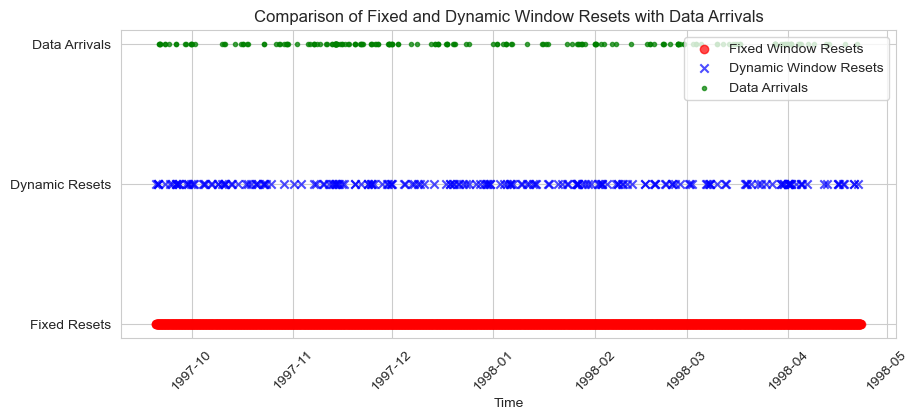

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Convert fixed window reset times to datetime if necessary
fixed_window_times_np = np.array(pd.to_datetime(fixed_window_times), dtype='datetime64[s]')
dynamic_window_times_np = np.array(pd.to_datetime(dynamic_window_times), dtype='datetime64[s]')
data_arrival_times_np = np.array(pd.to_datetime(data_arrival_times), dtype='datetime64[s]')

# Plot all fixed resets (since they are evenly spaced, they should be plotted fully)
fixed_sample = fixed_window_times_np  # Plot all fixed resets

# Sample dynamic resets and data arrivals
sample_size = 200
dynamic_sample = np.random.choice(dynamic_window_times_np, sample_size, replace=False)
arrival_sample = np.random.choice(data_arrival_times_np, sample_size, replace=False)

# Plot the reset times and data arrival times
plt.figure(figsize=(10, 4))

# Plot fixed window reset times as red circles (y=1)
plt.scatter(fixed_sample, [1] * len(fixed_sample), color='red', label='Fixed Window Resets', marker='o', alpha=0.7)

# Plot dynamic window reset times as blue crosses (y=2)
plt.scatter(dynamic_sample, [2] * len(dynamic_sample), color='blue', label='Dynamic Window Resets', marker='x', alpha=0.7)

# Plot data arrival times as green dots (y=3)
plt.scatter(arrival_sample, [3] * len(arrival_sample), color='green', label='Data Arrivals', marker='.', alpha=0.7)

# Format the plot
plt.xticks(rotation=45)
plt.yticks([1, 2, 3], ['Fixed Resets', 'Dynamic Resets', 'Data Arrivals'])
plt.xlabel('Time')
plt.title('Comparison of Fixed and Dynamic Window Resets with Data Arrivals')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Sequentially sample fixed window reset times (e.g., every 10th reset)
fixed_sample = fixed_window_times_np[::10]  # Take every 10th reset
